# Linear Regression

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


%matplotlib inline

## Introduction

**Regression Analysis** is a **parametric technique** meaning a set of parameters are used to **predict** the value of an unknown target variable (or dependent variable)  𝑦  based on one or more of known input features (or independent variables, predictors), often denoted by  𝑥 .

The term **linear** implies that the model functions along with a straight (or nearly straight) line.

**Simple Linear Regression** uses a single feature (one independent variable) to model a linear relationship with a target (the dependent variable) by fitting an optimal model (i.e. the best straight line) to describe this relationship.

**Multiple Linear Regression** uses more than one feature to predict a target variable by fitting the best linear relationship.

## Simple linear regression

A straight line can be written as :
$$ 𝑦=𝛽_0+𝛽_1𝑥 $$

There are **4 key components** :
- A **dependent variable** that needs to estimated and predicted (here:  𝑦 )
- An **independent variable**, the input variable (here:  𝑥 )
- The **slope** which determines the angle of the line (here: $𝛽_1$ ).
- The **intercept** which is the constant determining the value of  𝑦  when  𝑥  is 0. We denoted the intercept here as $𝛽_0$ .

When we draw our regression line, we use the following notations:

$$ 𝑦̂ =𝛽̂_0+𝛽̂_1𝑥 $$
 
As you can see, you're using a "hat" notation which stands for the fact that we are working with **estimations**.

### Steps

Calculate the following:

- The mean of the X  ($ \bar X $) 
- The mean of the Y  ($ \bar Y $) 
- The standard deviation of the X values  ($ 𝑆_𝑋 $) 
- The standard deviation of the y values  ($ 𝑆_𝑌 $) 
- The correlation between X and Y ( often denoted by the Greek letter "Rho" or  𝜌  - Pearson Correlation)

**Calculating Slope**

With the above ingredients in hand, we can calculate the slope (shown as  𝑏  below) of the best-fit line, using the formula:

$$ 𝛽̂_1 =𝜌\frac{𝑆_Y}{𝑆_𝑋} $$
 
This formula is also known as the **least-squares** method.

 It can be shown that this is also equal to:

$$ 𝛽̂_1 = \frac{ \bar x ∗\bar y - \bar{xy}}{( \bar x)^2 -\bar{(x^2)}} $$


**Calculating the intercept**

Now that we have the slope value ($𝛽̂_1$ ), we can put it back into our formula  ($ 𝑦̂ =𝛽̂_0+𝛽̂_1𝑥 $ )  to calculate intercept.

$$ 𝛽̂_0 = \bar Y −  𝛽̂_1 \bar X $$ 

**Predicting from the model**

When you have a regression line with defined parameters for slope and intercept as calculated above, you can easily predict the  𝑦̂   (target) value for a new  𝑥  (feature) value using the estimated parameter values:

$$ 𝑦̂ = 𝛽̂_1 𝑥+ 𝛽̂_0 $$
 
Remember that the difference between y and  𝑦̂   is that  𝑦̂   is the value predicted by the fitted model, whereas  𝑦  carries actual values of the variable (called the truth values) that were used to calculate the best fit.

### Examples

In [3]:
# Initialize vectors X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

In [4]:
def calc_slope(xs,ys):
    
    # Use the slope formula above and calculate the slope
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(X,Y)

0.5393518518518512

In [5]:
def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X,Y)
m, c
# (0.5393518518518512, 6.379629629629633)

(0.5393518518518512, 6.379629629629633)

In [6]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

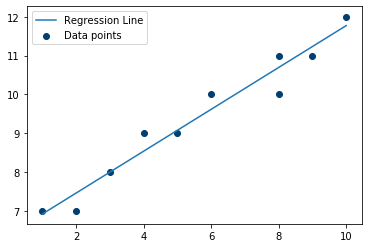

In [8]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()
plt.show()

## Coefficient of Determination

The $ R^2 $ or Coefficient of determination is a statistical measure that is used to assess the goodness of fit of a regression model.

$R^2$ explains how good our model is wheh compared to the baseline model, which is the horizontal line obtained by taking the mean of all observed responses of the dependent variable, ignoring the independent variables.

### Calculating R-squared

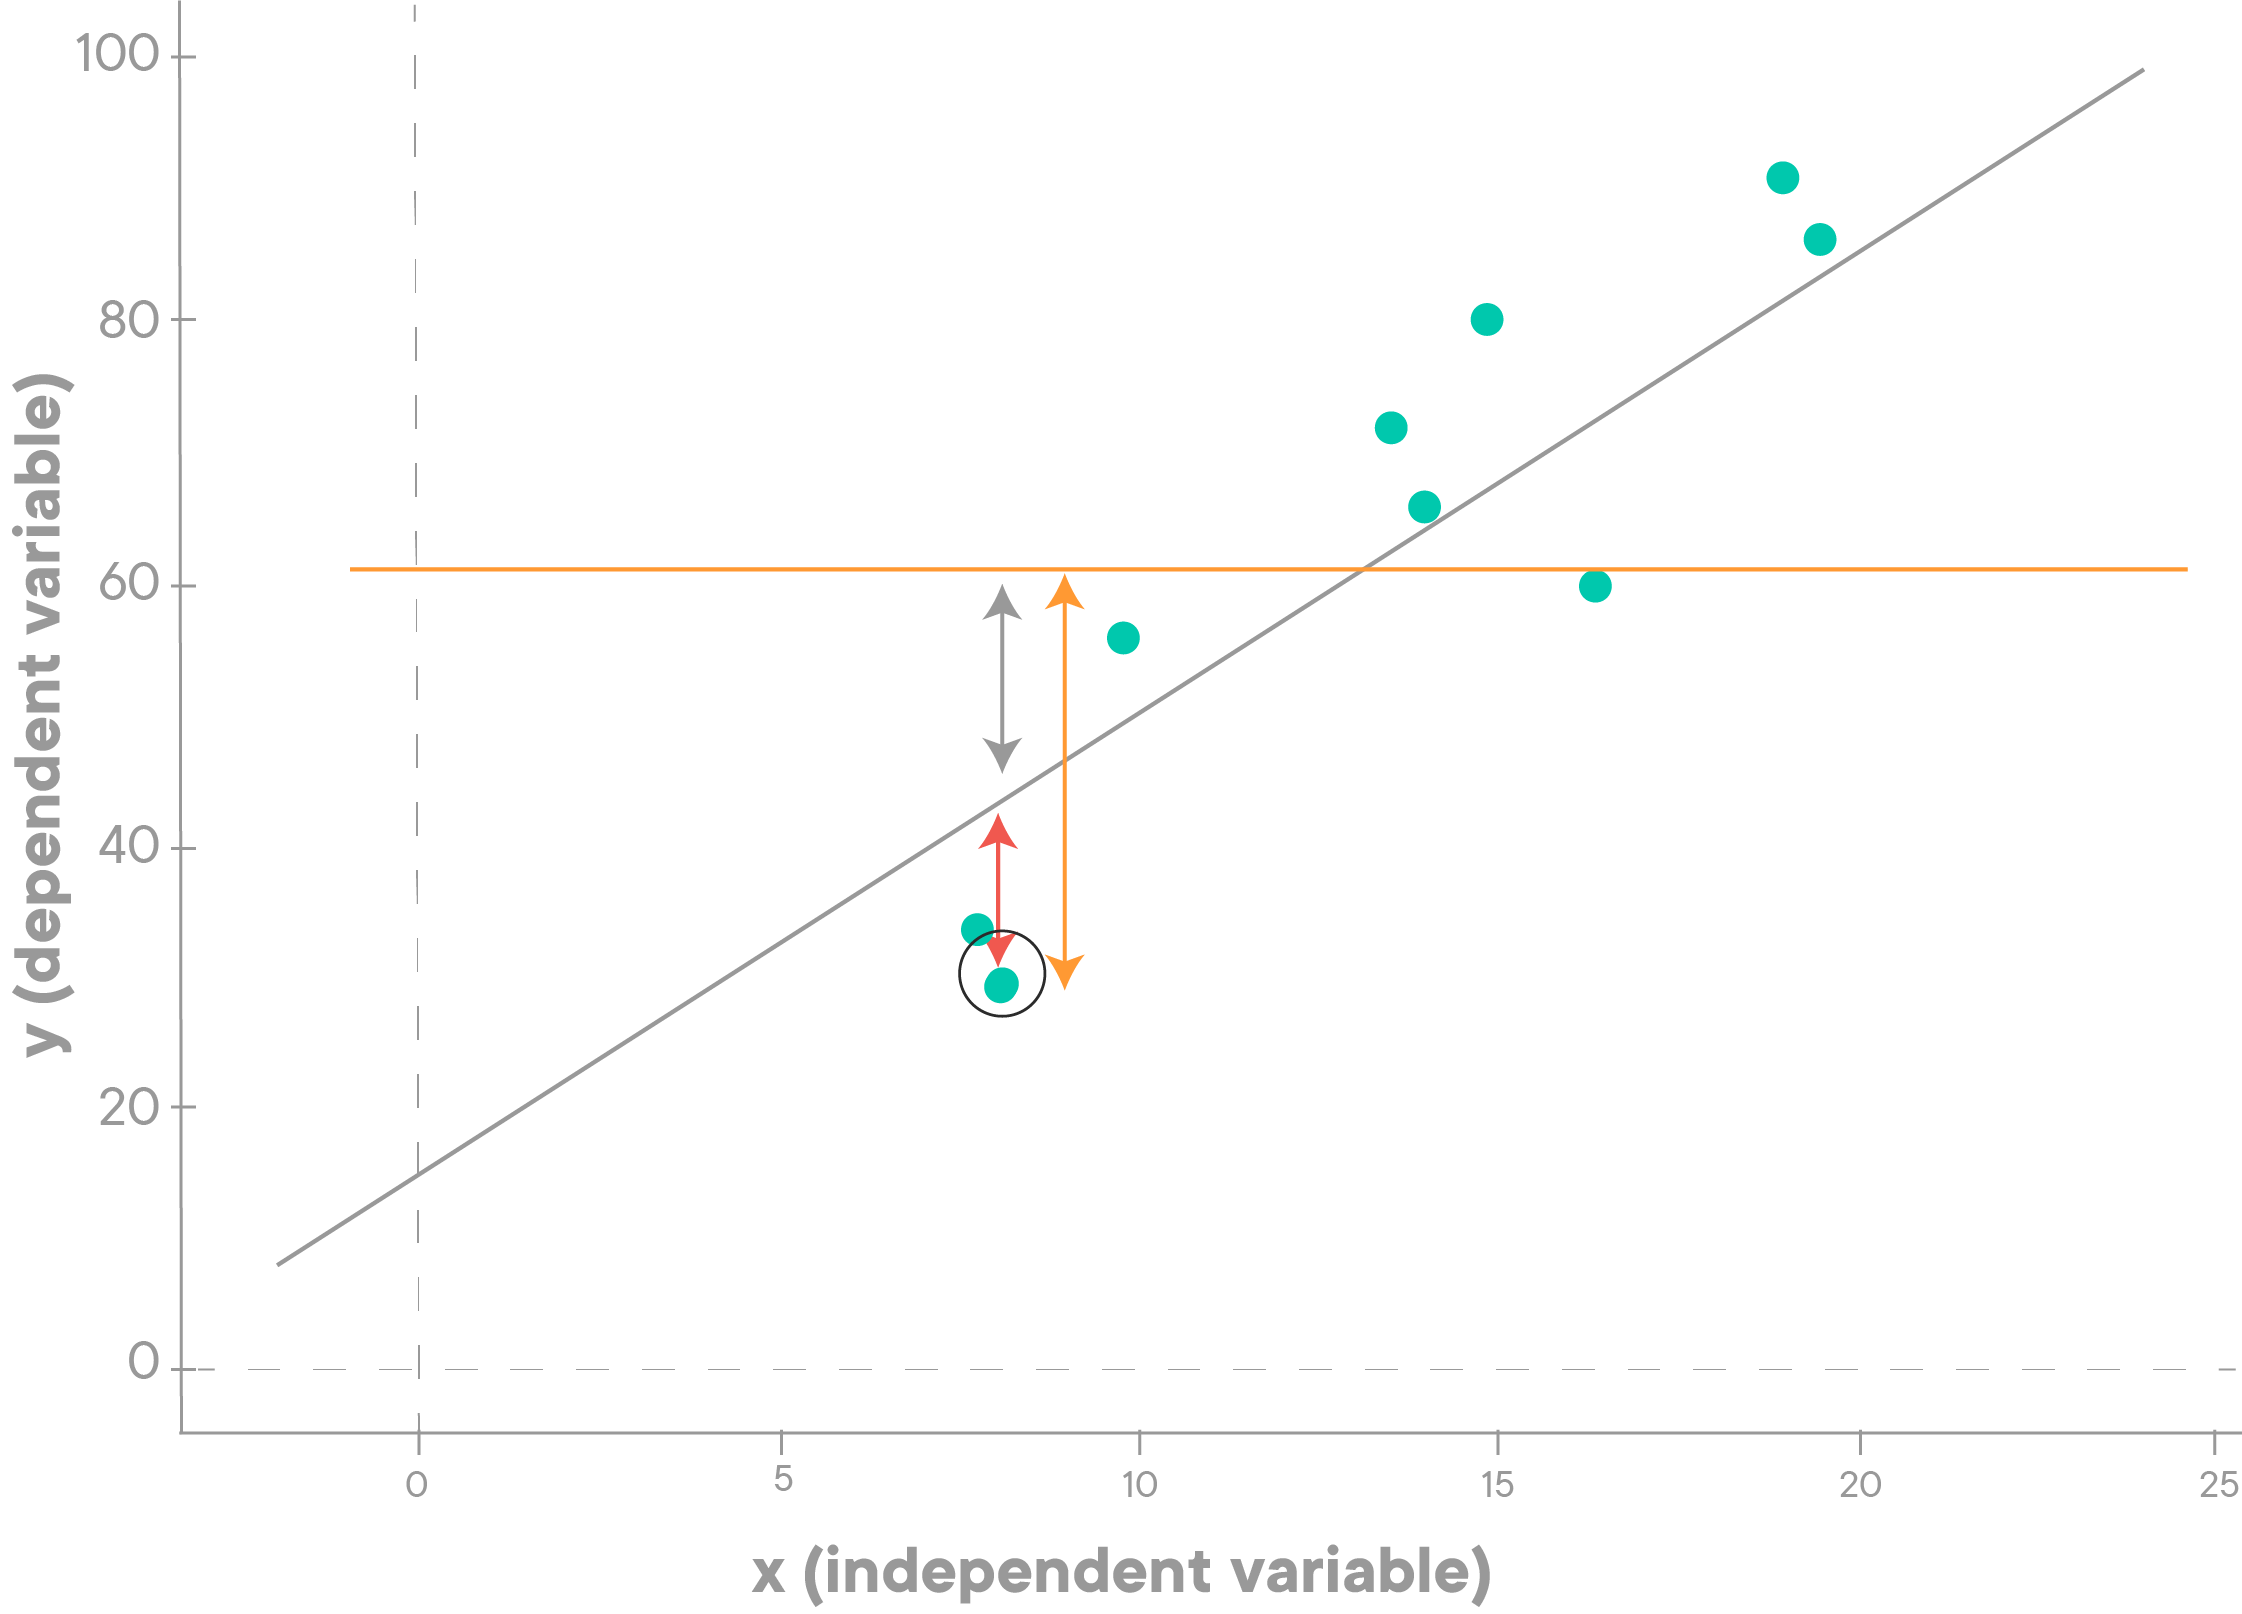

The mathematical formula to calculate R-Squared for a linear regression line is in terms of **squared errors** for the fitted model and the baseline model. It's calculated as :

$$ \large R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$

* $SS_{RES}$ (also called RSS) is the **Residual** sum of squared errors of our regression model also known as **$SSE$** (Sum of Squared Errors). $SS_{RES}$ is the squared difference between $y$ and $\hat y$. For the one highlighted observation in our graph above, the $SS_{RES}$ is denoted by the red arrow. This part of the error is not explained by our model.


* $SS_{TOT}$ (also called TSS) is the **Total** sum of squared error. $SS_{TOT}$ is the squared difference between $y$ and $\overline y$. For the one highlighted observation in our graph above, the $SS_{TOT}$ is denoted by the orange arrow.

For completion, 

* $SS_{EXP}$ (also called ESS) is the **Explained** sum of squared error. $SS_{EXP}$ is the squared difference between $\hat y$ and $\overline y$. For the one highlighted observation in our graph above, the $SS_{EXP}$ is denoted by the gray arrow.

### Interpretting R-squared

R-Squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values closer to 1 represent an (almost) perfect fit.

An R-squared value of say 0.85 can be described conceptually as:
*85% of the variations in dependent variable y are explained by the independent variable in our model.*